In [1]:
import pandas as pd
import numpy as np
import time

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns

from lda_model import simple_cleaner

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenreagin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
df1a = pd.read_csv('arxiv_datasets/cs.AI_1.csv')
df1b = pd.read_csv('arxiv_datasets/cs.AI_2.csv')
df2 = pd.read_csv('arxiv_datasets/cs.CC.csv')
df3 = pd.read_csv('arxiv_datasets/cs.CE.csv')
df4 = pd.read_csv('arxiv_datasets/cs.CG.csv')
df5 = pd.read_csv('arxiv_datasets/cs.CL.csv')
df6a = pd.read_csv('arxiv_datasets/cs.CV_1.csv')
df6b = pd.read_csv('arxiv_datasets/cs.CV_2.csv')
df7 = pd.read_csv('arxiv_datasets/cs.CY.csv')
df8 = pd.read_csv('arxiv_datasets/cs.DB.csv')
df9 = pd.read_csv('arxiv_datasets/cs.DC.csv')
df10 = pd.read_csv('arxiv_datasets/cs.DL.csv')
df11 = pd.read_csv('arxiv_datasets/cs.DS.csv')
df12 = pd.read_csv('arxiv_datasets/cs.ET.csv')
df13 = pd.read_csv('arxiv_datasets/cs.FL.csv')
df14 = pd.read_csv('arxiv_datasets/cs.GL.csv')
df15 = pd.read_csv('arxiv_datasets/cs.GR.csv')
df16 = pd.read_csv('arxiv_datasets/cs.GT.csv')
df17 = pd.read_csv('arxiv_datasets/cs.AR.csv')
df18 = pd.read_csv('arxiv_datasets/cs.HC.csv')
df19 = pd.read_csv('arxiv_datasets/cs.IR.csv')
df20 = pd.read_csv('arxiv_datasets/cs.IT.csv')
df21 = pd.read_csv('arxiv_datasets/cs.LO.csv')
df22a = pd.read_csv('arxiv_datasets/cs.LG_1.csv')
df22b = pd.read_csv('arxiv_datasets/cs.LG_2.csv')
df22c = pd.read_csv('arxiv_datasets/cs.LG_3.csv')
df23 = pd.read_csv('arxiv_datasets/cs.MA.csv')
df24 = pd.read_csv('arxiv_datasets/cs.MS.csv')
df25 = pd.read_csv('arxiv_datasets/cs.NI.csv')
df26 = pd.read_csv('arxiv_datasets/cs.NE.csv')
df27 = pd.read_csv('arxiv_datasets/cs.NA.csv')
df28 = pd.read_csv('arxiv_datasets/cs.OS.csv')
df29 = pd.read_csv('arxiv_datasets/cs.PF.csv')
df30 = pd.read_csv('arxiv_datasets/cs.PL.csv')
df31 = pd.read_csv('arxiv_datasets/cs.RO.csv')
df32 = pd.read_csv('arxiv_datasets/cs.SI.csv')
df33 = pd.read_csv('arxiv_datasets/cs.SD.csv')
df34 = pd.read_csv('arxiv_datasets/cs.SE.csv')
df35 = pd.read_csv('arxiv_datasets/cs.SC.csv')
df36 = pd.read_csv('arxiv_datasets/cs.SY.csv')
df37 = pd.read_csv('arxiv_datasets/cs.CR.csv')
df38 = pd.read_csv('arxiv_datasets/cs.DM.csv')

In [38]:
df = pd.concat([df1a,df1b,df2,df3,df4,df5,df6a,df6b,df7,df8,df9,df10,
                df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
                df21,df22a,df22b,df22c,df23,df24,df25,df26,df27,df28,df29,df30,
                df31,df32,df33,df34,df35,df36,df37,df38]).reset_index(drop=True)

In [39]:
df = df.drop_duplicates().reset_index(drop=True)[['Title','Published','Summary']]
df.shape

(582340, 3)

In [40]:
start_time = time.time()
df['cleaned_text'] = df['Summary'].apply(simple_cleaner)
print(time.time()-start_time)

91.56280493736267


In [41]:
df.head(2)

,Title,Published,Summary,cleaned_text
0,Domain-Independent Dynamic Programming,2024-01-25T01:48:09Z,"For combinatorial optimization problems, mod...",combinatorial optimization problem modelbased ...
1,Agent-based Simulation with Netlogo to Evaluat...,2024-01-25T13:05:06Z,In this paper an agent-based simulation is d...,paper agentbased simulation developed order ev...


In [42]:
from collections import Counter

In [313]:
df['pub_date'] = pd.to_datetime(df['Published']).dt.date

date_df = pd.DataFrame(df.groupby('pub_date')['cleaned_text'].sum()).reset_index()
date_df['number_of_papers'] = [num for num in df.groupby('pub_date')['cleaned_text'].count()]

print(time.time()-start_time)

date_df

1170.629371881485


,pub_date,cleaned_text,number_of_papers
0,2012-09-12,backpropagation algorithm one widely used popu...,18
1,2012-09-13,theory random real number exceedingly welldeve...,12
2,2012-09-14,automatic text summarization preprocessing imp...,32
3,2012-09-15,several variant constraint satisfaction proble...,21
4,2012-09-16,present framework largescale distributed escie...,10
...,...,...,...
4107,2024-01-27,diffusion planning recognized effective decisi...,181
4108,2024-01-28,predicting next activity ongoing process one c...,187
4109,2024-01-29,answering complex logical query incomplete kno...,501
4110,2024-01-30,difficulty one key driver player engagement of...,507


In [314]:
date_df['cleaned_text'].str.split().apply(Counter)
print(time.time()-start_time)

1177.999725818634


In [315]:
date_df['number_of_tokens'] = date_df['cleaned_text'].str.split().apply(len)
print(time.time()-start_time)

1180.5570938587189


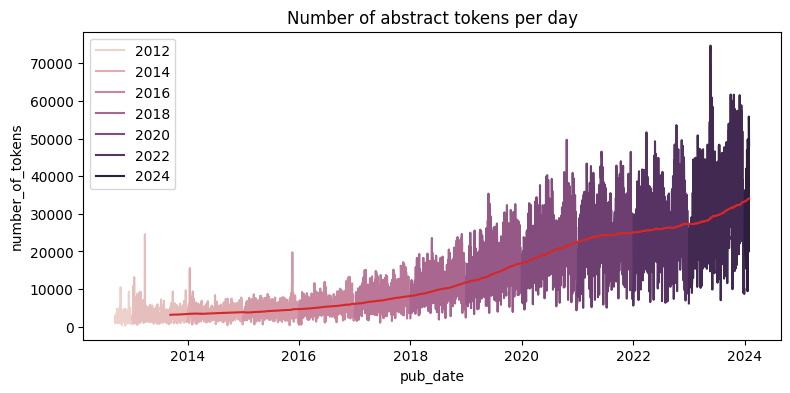

In [316]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['number_of_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of abstract tokens per day');

In [317]:
date_df['unique_tokens'] = date_df['cleaned_text'].str.split().apply(set).apply(len)
print(time.time()-start_time)

1186.6834087371826


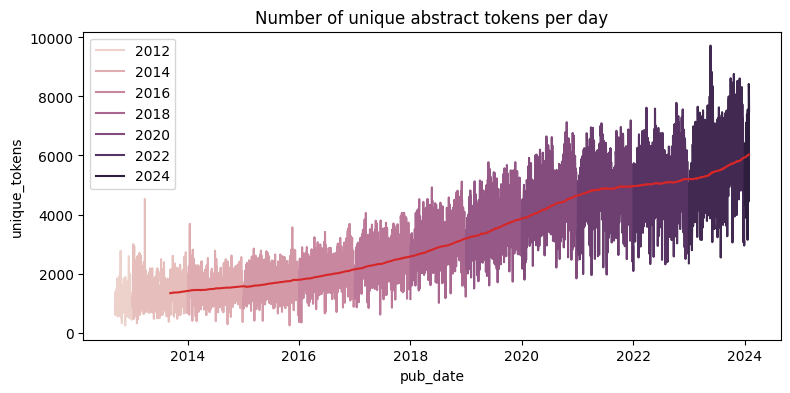

In [318]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=date_df['unique_tokens'].rolling(360).mean(), x=date_df['pub_date'])
plt.title('Number of unique abstract tokens per day');

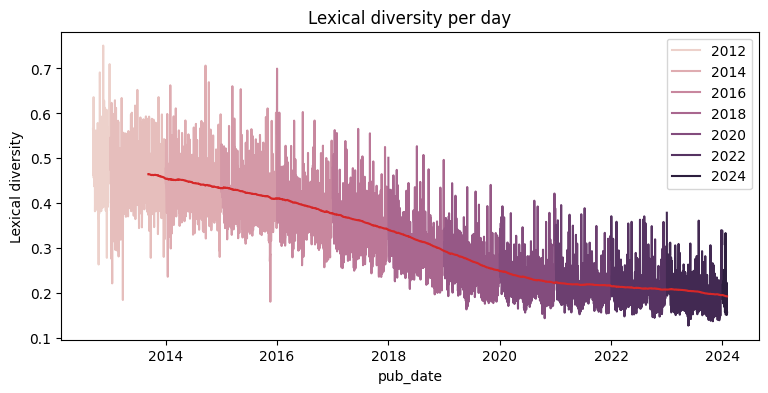

In [319]:
plt.figure(figsize=(9,4))
sns.lineplot(y=date_df['unique_tokens'] / date_df['number_of_tokens'], x=date_df['pub_date'], hue=pd.to_datetime(date_df['pub_date']).dt.year)
sns.lineplot(y=(date_df['unique_tokens'] / date_df['number_of_tokens']).rolling(360).mean(), x=date_df['pub_date'])
plt.ylabel("Lexical diversity")
plt.title('Lexical diversity per day');

In [320]:
date_df['cleaned_text'].apply(len).sum()

507350152

### Creating Word Vectors

In [321]:
from sklearn.feature_extraction.text import CountVectorizer

In [322]:
#### turn the text strings into token vectors
#### but only if a token appears in at least 100 documents 
count_text_vectorizer = CountVectorizer(min_df=100)
count_text_vectors = count_text_vectorizer.fit_transform(date_df['cleaned_text'])

print(time.time()-start_time)

1203.6927947998047


In [323]:
count_text_vectors.shape

(4112, 13854)

In [324]:
count_text_vectorizer.get_feature_names_out()

array(['000', '0001', '001', ..., 'zoom', 'zooming', 'zsl'], dtype=object)

In [325]:
date_df = pd.concat([date_df,pd.DataFrame(count_text_vectors.toarray(), columns=count_text_vectorizer.get_feature_names_out())],axis=1)

print(time.time()-start_time)

1203.9660468101501


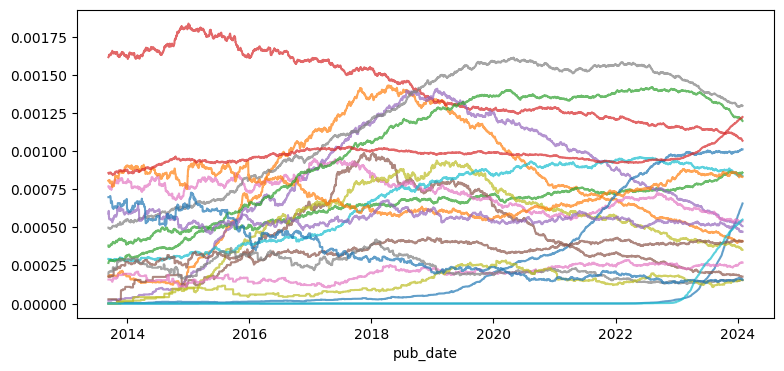

In [326]:
plt.figure(figsize=(9,4))
token_list = ['llm', 'recurrent', 'optimize', 'optimal', 'cnn', 'rnn', 'neighbor',
             'architecture', 'lstm', 'transfer', 'transformer', 'quantum', 'learn', #'language',
             'large', 'cpu', 'gpu', 'nvidia', 'intel', 'cryptocurrency','chatgpt', 'turing']
for i in token_list:
    sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean() / date_df[i].max(), alpha=0.7)
#plt.title('Use of the word "neural"')
#plt.axhline(3, ls='--')
#plt.legend(token_list)

<Axes: xlabel='number_of_papers', ylabel='number_of_tokens'>

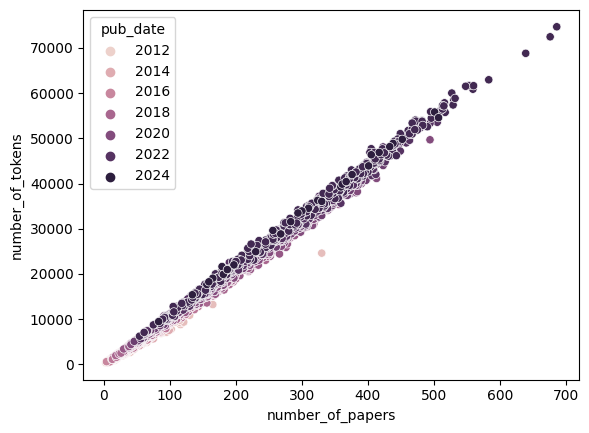

In [327]:
sns.scatterplot(x=date_df['number_of_papers'], y=date_df['number_of_tokens'],hue=pd.to_datetime(date_df['pub_date']).dt.year)

<Axes: ylabel='pub_date'>

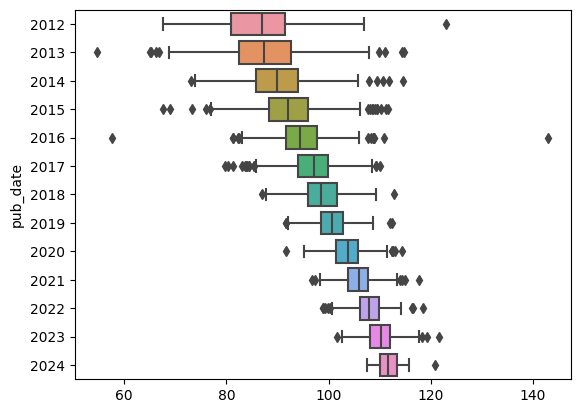

In [328]:
sns.boxplot(x=date_df['number_of_tokens'] / date_df['number_of_papers'],y=(pd.to_datetime(date_df['pub_date']).dt.year).astype('category'))


<Axes: ylabel='Count'>

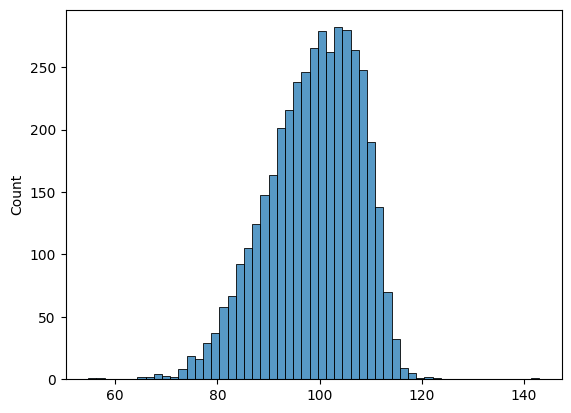

In [329]:
sns.histplot(date_df['number_of_tokens'] / date_df['number_of_papers'])

In [330]:
def common_token_counter(clean_string):
    return [j for j,k in Counter(clean_string.split()).most_common(10)]

In [331]:
top_tokens_list = Counter(" ".join([i for i in date_df['cleaned_text'].apply(common_token_counter).str.join(sep=' ')]).split())

print(f"Number of total tokens: {len(top_tokens_list)}")

Number of total tokens: 653


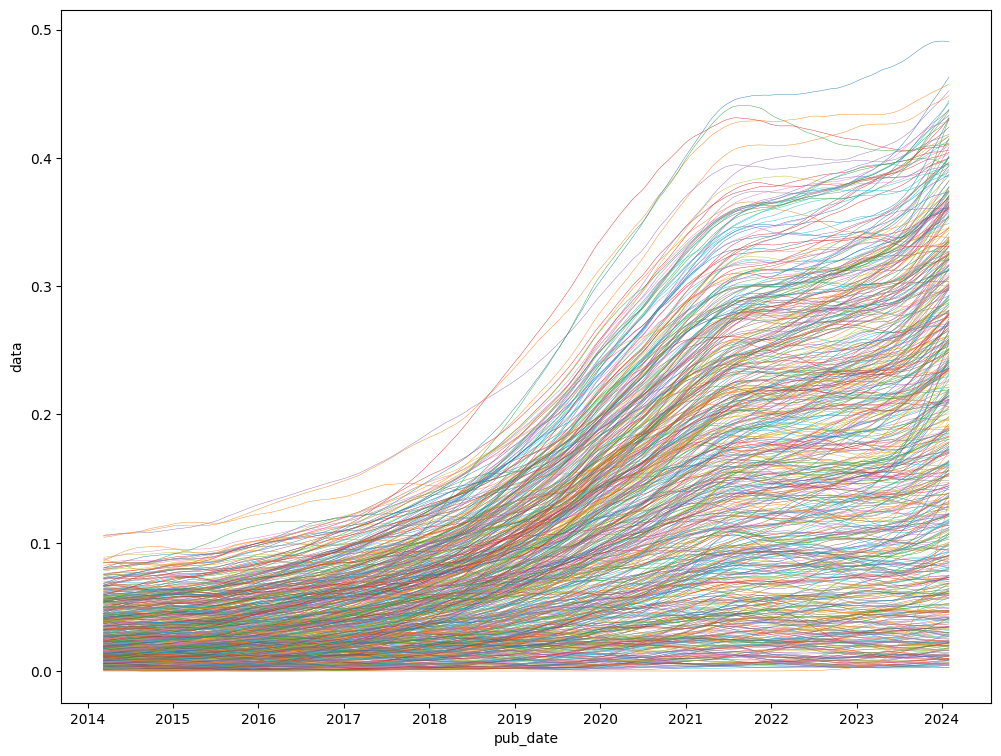

In [332]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df[i].max()).rolling(360).mean().rolling(180).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

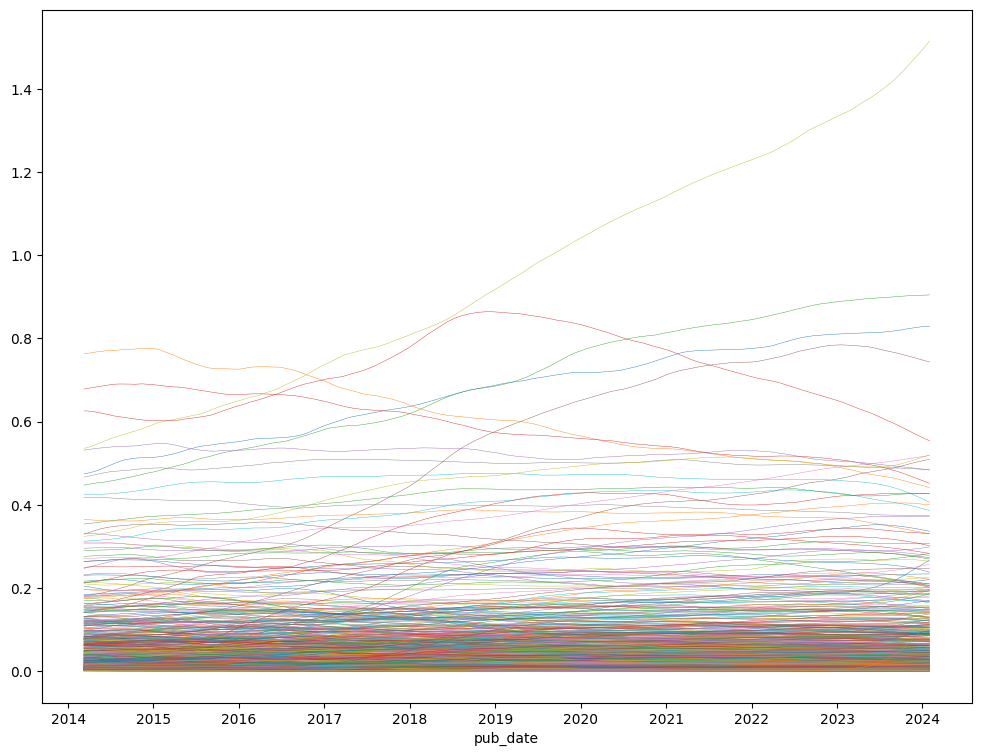

In [333]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean(), linewidth=0.3)
    except:
        pass
#plt.title('Use of the word "neural"')
#plt.xlim(2016,2024)

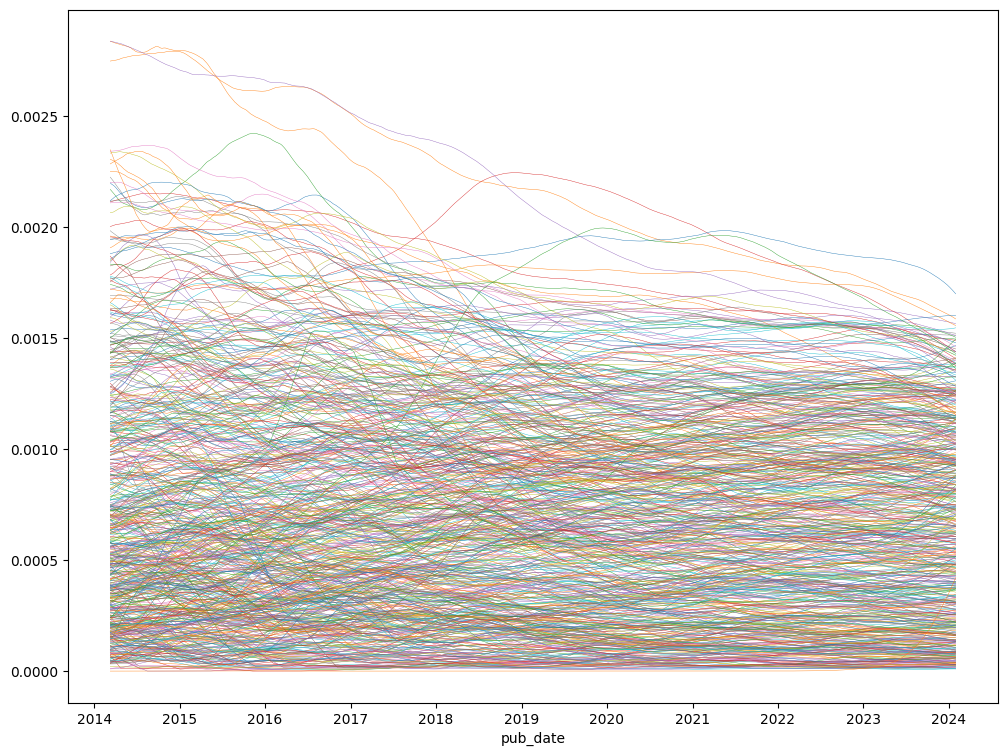

In [350]:
plt.figure(figsize=(12,9))
token_list = top_tokens_list

for i in token_list:
    try:
#        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean()*100, alpha=0.3)
        sns.lineplot(x=date_df['pub_date'], y=(date_df[i] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean() / date_df[i].max(), linewidth=0.3,)
    except:
        pass

<Axes: xlabel='pub_date'>

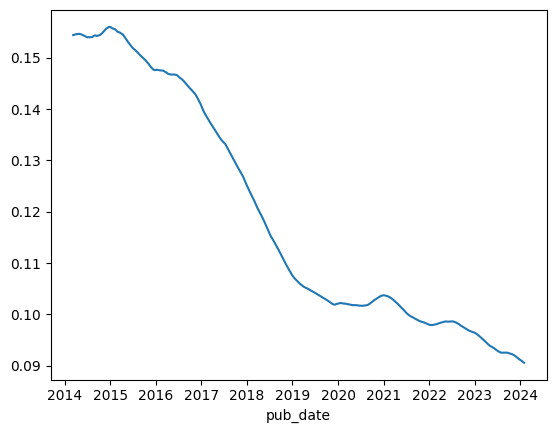

In [346]:
sns.lineplot(x=date_df['pub_date'],y=(date_df['linear'] / date_df['number_of_papers']).rolling(360).mean().rolling(180).mean())


In [351]:
#dataset for simple nnet trial
date_df.drop(columns=['cleaned_text','number_of_papers','number_of_tokens','unique_tokens'])

,pub_date,000,0001,001,002,005,01,012,015,01n,...,zeta,zf,zhang,zhou,zigzag,zone,zoo,zoom,zooming,zsl
0,2012-09-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-09-13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012-09-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012-09-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-09-16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,2024-01-27,0,5,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4108,2024-01-28,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
4109,2024-01-29,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4110,2024-01-30,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,8,0,0,0,2
